In [13]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")

## Set directories

In [14]:
pwd

'D:\\Users\\Lee\\Desktop\\coding\\Projects\\CNN Landscapes'

In [15]:
data_dir = 'D:\\Users\\Lee\\Desktop\\coding\\Projects\\CNN Landscapes\\nature-scenes\\'

In [16]:
os.listdir(data_dir)

['pred', 'test', 'train']

In [17]:
train_path = data_dir + "train\\"
test_path = data_dir + "test\\"
pred_path = data_dir + "pred\\"

In [18]:
os.listdir(train_path)

['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

In [19]:
os.listdir(test_path)

['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

In [20]:
#14k train images, 4k test images

### Example image

In [21]:
os.listdir(train_path+"glacier\\")[0]

'10.jpg'

In [22]:
single_image = train_path+"glacier\\10.jpg"

In [23]:
plt.imread(single_image).shape

(150, 150, 3)

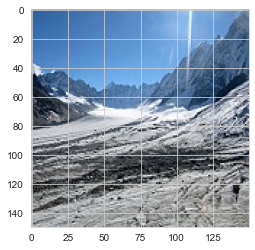

In [24]:
plt.imshow(plt.imread(single_image))

### Checking height and width

In [25]:
height = []
width = []

for i in os.listdir(train_path+"buildings\\"):
    img = plt.imread(train_path+"buildings\\" + i)
    h, w, c = img.shape
    height.append(h)
    width.append(w)

In [26]:
np.mean(height)

149.9881332724783

In [27]:
np.mean(width)
#essentially 150x150x3

150.0

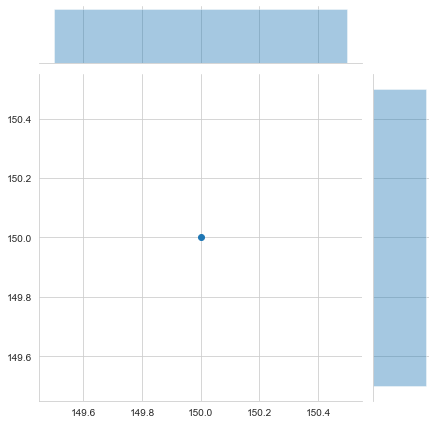

In [28]:
sns.jointplot(h, w)

## Image Manipulation and Batches

In [29]:
150*150*3
#needs batches as result is large

67500

In [30]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [31]:
plt.imread(single_image).max()
#needs to be scaled
#rescale by (1/255)

255

In [32]:
#for artifically expanding the dataset and scaling
image_gen = ImageDataGenerator(rescale=(1/255), 
                              width_shift_range=0.1,
                              height_shift_range=0.1,
                              shear_range=0.1,
                              zoom_range=0.1,
                              vertical_flip=True,
                              fill_mode="nearest")

## Model

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [34]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(1,1),
                input_shape=(150,150,3), activation="relu"))

model.add(Conv2D(filters=32, kernel_size=(3,3),
                input_shape=(150,150,3), activation="relu"))

model.add(Conv2D(filters=64, kernel_size=(3,3),
                input_shape=(150,150,3), activation="relu"))

model.add(Conv2D(filters=64, kernel_size=(3,3),
                input_shape=(150,150,3), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128, activation="relu"))

model.add(Dense(6, activation="softmax"))
model.compile(loss="categorical_crossentropy", optimizer="adam",
             metrics=["accuracy"])

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 148, 148, 32)      9248      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 146, 146, 64)      18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 144, 144, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 72, 72, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 331776)            0         
_________________________________________________________________
dense (Dense)                (None, 128)               4

In [36]:
from tensorflow.keras.callbacks import EarlyStopping

In [37]:
early_stop = EarlyStopping(monitor="val_loss", patience=2)

In [38]:
#for train
train_image_gen = image_gen.flow_from_directory(train_path,
                                               target_size=(150,150),
                                               color_mode="rgb",
                                               batch_size=16,
                                               class_mode="categorical")

Found 14034 images belonging to 6 classes.


In [39]:
#for test
test_image_gen = image_gen.flow_from_directory(test_path,
                                              target_size=(150,150),
                                              color_mode="rgb",
                                              batch_size=16,
                                              class_mode="categorical",
                                              shuffle=False)

Found 3000 images belonging to 6 classes.


In [40]:
train_image_gen.class_indices

{'buildings': 0,
 'forest': 1,
 'glacier': 2,
 'mountain': 3,
 'sea': 4,
 'street': 5}

In [41]:
results = model.fit(train_image_gen, validation_data=test_image_gen,
                    epochs=30, callbacks=[early_stop])

Epoch 1/30
878/878 [==============================] - 920s 1s/step - loss: 1.1652 - accuracy: 0.5325 - val_loss: 0.9804 - val_accuracy: 0.5903
Epoch 2/30
878/878 [==============================] - 934s 1s/step - loss: 0.9465 - accuracy: 0.6172 - val_loss: 0.8598 - val_accuracy: 0.6603
Epoch 3/30
878/878 [==============================] - 935s 1s/step - loss: 0.8147 - accuracy: 0.6859 - val_loss: 0.7804 - val_accuracy: 0.7017
Epoch 4/30
878/878 [==============================] - 947s 1s/step - loss: 0.7050 - accuracy: 0.7373 - val_loss: 0.6578 - val_accuracy: 0.7623
Epoch 5/30
878/878 [==============================] - 928s 1s/step - loss: 0.6353 - accuracy: 0.7652 - val_loss: 0.6189 - val_accuracy: 0.7653
Epoch 6/30
878/878 [==============================] - 948s 1s/step - loss: 0.5979 - accuracy: 0.7807 - val_loss: 0.5897 - val_accuracy: 0.7793
Epoch 7/30
878/878 [==============================] - 941s 1s/step - loss: 0.5781 - accuracy: 0.7835 - val_loss: 0.5562 - val_accuracy: 0.7923

In [42]:
model.save("landscape_model.h5")

## Metrics

In [44]:
from sklearn.metrics import confusion_matrix, classification_report

In [45]:
metrics = pd.DataFrame(model.history.history)

In [46]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,1.165220,0.532493,0.980403,0.590333
1,0.946482,0.617215,0.859816,0.660333
2,0.814688,0.685906,0.780406,0.701667
3,0.704985,0.737281,0.657810,0.762333
4,0.635321,0.765213,0.618945,0.765333
5,0.597920,0.780676,0.589727,0.779333
6,0.578116,0.783454,0.556228,0.792333
7,0.550478,0.798347,0.554892,0.802000
8,0.531913,0.805757,0.589418,0.788667
9,0.521532,0.807183,0.588297,0.784667


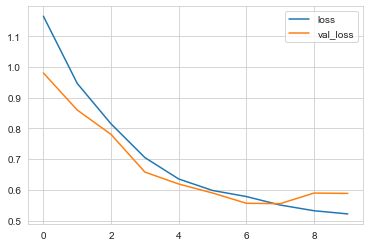

In [47]:
metrics[["loss", "val_loss"]].plot()

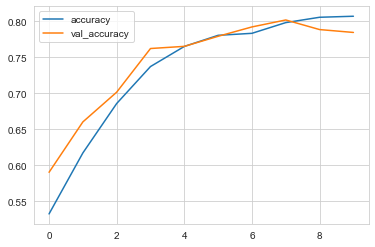

In [48]:
metrics[["accuracy", "val_accuracy"]].plot()

In [49]:
model.evaluate(test_image_gen)

188/188 [==============================] - 31s 166ms/step - loss: 0.5761 - accuracy: 0.7893s - loss: 0.5804 


[0.576097309589386, 0.7893333435058594]

In [59]:
predictions = model.predict_classes(test_image_gen)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [54]:
#real classes
test_image_gen.classes

array([0, 0, 0, ..., 5, 5, 5])

In [64]:
train_image_gen.class_indices

{'buildings': 0,
 'forest': 1,
 'glacier': 2,
 'mountain': 3,
 'sea': 4,
 'street': 5}

In [62]:
print(classification_report(test_image_gen.classes, predictions))
#good at predicting and diffrentiating:
#buildings and forests - likely because their colour is distinct from others

              precision    recall  f1-score   support

           0       0.92      0.52      0.67       437
           1       0.96      0.94      0.95       474
           2       0.74      0.83      0.78       553
           3       0.83      0.69      0.76       525
           4       0.71      0.90      0.79       510
           5       0.74      0.85      0.79       501

    accuracy                           0.79      3000
   macro avg       0.82      0.79      0.79      3000
weighted avg       0.81      0.79      0.79      3000



In [63]:
confusion_matrix(test_image_gen.classes, predictions)
#glaciers were confused with mountains, potentially due to size and structure
#streets were confused with buildings, likely due to sharing colours and 
#being within the same vicinity

array([[229,   6,  11,  11,  46, 134],
       [  0, 446,   7,   7,   6,   8],
       [  1,   3, 460,  37,  47,   5],
       [  0,   1, 106, 363,  55,   0],
       [  2,   1,  32,  15, 458,   2],
       [ 17,  10,   9,   2,  37, 426]], dtype=int64)

## Prediction on an UNSEEN image
This is from the pred_path, not using the training or test images.

In [65]:
len(os.listdir(pred_path))

7301

In [95]:
def randomise_image():
    random_loc = np.random.randint(0, len(os.listdir(pred_path)))
    random_img = os.listdir(pred_path)[random_loc]
    random_img = pred_path + random_img
    
    print(random_img)
    plt.imshow(plt.imread(random_img))
    
    return plt.imread(random_img).reshape(1, 150, 150, 3)

D:\Users\Lee\Desktop\coding\Projects\CNN Landscapes\nature-scenes\pred\21528.jpg


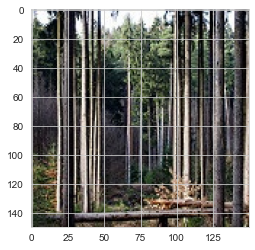

In [96]:
random_arr = randomise_image()

In [97]:
model.predict(random_arr)

array([[0., 1., 0., 0., 0., 0.]], dtype=float32)

In [94]:
train_image_gen.class_indices

{'buildings': 0,
 'forest': 1,
 'glacier': 2,
 'mountain': 3,
 'sea': 4,
 'street': 5}